## FILM INDUSTRY ANALYSIS

* Author: Joan Kabura Njoroge
* Course: Data Science Full Time
* Scduled project review date/time: May 28, 2021
* Instructor name: Mark Tiba
* Blog post URL:

# 1. BUSINESS UNDERSTANDING
### 1.1. Business problem:
Microsoft wants to get in on the fun of huge firms producing original video content. Although they don't have any experience making movies, they have chosen to start a new film production company.My task is to research the categories of movies that are currently performing the best at the box office. I'll then turn those discoveries into useful information that the CEO of Microsoft's new film company may use to select what kinds of movies to make.

### 1.2. Success Indicator:
1. Who are the prospective rival companies doing business at the moment?
2. How are the domestic and international markets similar?
3. Which movie genres are now making the most money at the box office?
4. Does a movie's running time have an impact on how well it does financially and how    popular it is?
5. What categories are most popular right now?

# 2. DATA UNDERSTANDING
# 2.1. Importing the relevant packages


In [1]:
#import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandasql import sqldf

%matplotlib inline

pysqldf = lambda q: sqldf(q, globals())

# 2.2. Reading the datasets


In [2]:
import sqlite3
conn = sqlite3.connect('Data/im.db')

imdb_df = pd.read_sql("""SELECT name FROM sqlite_master WHERE type = 'table';""", conn)
imdb_df

,name
0,movie_basics
1,directors
2,known_for
3,movie_akas
4,movie_ratings
5,persons
6,principals
7,writers


In [31]:
movie_gross_df = pd.read_csv('Data/bom.movie_gross.csv')
movie_gross_df

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [4]:
movie_info_df = pd.read_table('Data/movie_info.tsv', index_col=0)
movie_info_df.isna().sum()

synopsis          62
rating             3
genre              8
director         199
writer           449
theater_date     359
dvd_date         359
currency        1220
box_office      1220
runtime           30
studio          1066
dtype: int64

In [5]:
reviews_df = pd.read_table('Data/reviews.tsv', index_col=0, encoding='windows-1252')

reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54432 entries, 3 to 2000
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   review      48869 non-null  object
 1   rating      40915 non-null  object
 2   fresh       54432 non-null  object
 3   critic      51710 non-null  object
 4   top_critic  54432 non-null  int64 
 5   publisher   54123 non-null  object
 6   date        54432 non-null  object
dtypes: int64(1), object(6)
memory usage: 3.3+ MB


In [6]:
tmdb_movies_df = pd.read_csv('Data/tmdb_movies.csv', index_col=0)
tmdb_movies_df.isna().sum()

genre_ids            0
id                   0
original_language    0
original_title       0
popularity           0
release_date         0
title                0
vote_average         0
vote_count           0
dtype: int64

In [7]:
tn_movie_budgets_df = pd.read_csv('Data/tn_movie_budgets.csv', index_col=0)
tn_movie_budgets_df.isna().sum()

release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

# 2.3 Exploring the datasets

## 2.3.1. Data Undrstanding
First, we look into the different tables in the imdb database.
* Directors table

In [8]:
# one movie can have multiple directors
q = """
SELECT *
FROM directors
;
"""
directors = pd.read_sql(q, conn)
directors.tail(10)

,movie_id,person_id
291164,tt8993410,nm1410292
291165,tt8996424,nm7477810
291166,tt8998302,nm10121510
291167,tt8999892,nm10122247
291168,tt8999892,nm10122247
291169,tt8999974,nm10122357
291170,tt9001390,nm6711477
291171,tt9001494,nm10123242
291172,tt9001494,nm10123248
291173,tt9004986,nm4993825


In [9]:
# search for duplicates rows
print(directors.duplicated().sum())

# would be necessary to drop the duplicate rows
directors = directors.drop_duplicates()

# check whether the duplicates are removed
print(directors.duplicated().sum())

127639
0


Findings about the directors table:
1. movie_id is the primary key
2. one movie_id can have multiple person_id i.e multiple directors

* Persons table

In [10]:
q = """
SELECT *
FROM persons
;
"""
persons = pd.read_sql(q, conn)
persons.tail()

,person_id,primary_name,birth_year,death_year,primary_profession
606643,nm9990381,Susan Grobes,NaN,NaN,actress
606644,nm9990690,Joo Yeon So,NaN,NaN,actress
606645,nm9991320,Madeline Smith,NaN,NaN,actress
606646,nm9991786,Michelle Modigliani,NaN,NaN,producer
606647,nm9993380,Pegasus Envoyé,NaN,NaN,"director,actor,writer"


In [11]:
persons.nunique()

person_id             606648
primary_name          577203
birth_year               267
death_year               214
primary_profession      8647
dtype: int64

In [12]:
persons[persons['primary_name'].duplicated()].sort_values(by = 'primary_name')

,person_id,primary_name,birth_year,death_year,primary_profession
279631,nm4062141,A. Venkatesh,NaN,NaN,"director,actor,writer"
156216,nm1701176,A. Venkatesh,NaN,NaN,"cinematographer,camera_department,editor"
387377,nm8956236,A. Venkatesh,NaN,NaN,producer
436444,nm6758318,A.J. Khan,NaN,NaN,producer
565680,nm7645047,A.K. Azad,NaN,NaN,"music_department,composer"
...,...,...,...,...,...
290560,nm3216359,Óscar Pérez,NaN,NaN,"producer,director,writer"
446899,nm7114545,Özer Kiziltan,NaN,NaN,cinematographer
433984,nm6356309,Özgür Bakar,NaN,NaN,"director,writer,producer"
603769,nm8122779,Øystein Mamen,NaN,NaN,cinematographer


In [13]:
persons['primary_profession'].str.contains('director').sum()

146033

Findings about the persons table:
1. person_id is the primary key of the persons table
2. person_id is the foreign key of the directors table.
3. the same name has been used on multiple person_id and profession, suggesting that one person may have played different roles in different movies. THough we are only interested in the director profession which appears 146033 times

APPROACH:
the directors table and persons table can be useful in determining the highest rated directors using the person_id

* Movie_basics table

In [14]:
q = """
SELECT *
FROM movie_basics
;
"""
movie_basics = pd.read_sql(q, conn)
movie_basics.head(10)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
5,tt0111414,A Thin Life,A Thin Life,2018,75.0,Comedy
6,tt0112502,Bigfoot,Bigfoot,2017,NaN,"Horror,Thriller"
7,tt0137204,Joe Finds Grace,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy"
8,tt0139613,O Silêncio,O Silêncio,2012,NaN,"Documentary,History"
9,tt0144449,Nema aviona za Zagreb,Nema aviona za Zagreb,2012,82.0,Biography


In [15]:
# search for duplicates
movie_basics.nunique()

movie_id           146144
primary_title      136071
original_title     137773
start_year             19
runtime_minutes       367
genres               1085
dtype: int64

We can see that there are more entries in the movie_id column than the primary_title column. Suggesting that there may be some movies repeated 

In [16]:
movie_basics[movie_basics['primary_title'].duplicated()].tail(10)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
146053,tt9903716,Jessie,Jessie,2019,106.0,"Horror,Thriller"
146068,tt9905256,The Cross,The Cross,2012,NaN,Thriller
146078,tt9906218,Unstoppable,Unstoppable,2019,84.0,Documentary
146106,tt9910778,DK Bose,DK Bose,2019,117.0,Comedy
146117,tt9913418,Fragments,Fragments,2019,NaN,"Drama,Mystery,Sci-Fi"
146119,tt9913594,Bacchanalia,Bacchanalia,2017,72.0,"Drama,Mystery,Thriller"
146120,tt9913936,Paradise,Paradise,2019,NaN,"Crime,Drama"
146125,tt9914642,Albatross,Albatross,2017,NaN,Documentary
146134,tt9916160,Drømmeland,Drømmeland,2019,72.0,Documentary
146135,tt9916170,The Rehearsal,O Ensaio,2019,51.0,Drama


In [17]:
movie_basics[movie_basics['primary_title'] == 'Albatross']

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
9094,tt1541149,Albatross,Albatross,2011,90.0,Drama
53042,tt3128706,Albatross,Albatross,2015,89.0,"Comedy,Drama,Sport"
146125,tt9914642,Albatross,Albatross,2017,NaN,Documentary


In [18]:
movie_basics[movie_basics['primary_title'] == 'The Rehearsal']

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
99621,tt5820812,The Rehearsal,The Rehearsal,2016,102.0,Drama
146135,tt9916170,The Rehearsal,O Ensaio,2019,51.0,Drama


In [19]:
movie_basics[movie_basics['primary_title'] == 'Bacchanalia']

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
53806,tt3167458,Bacchanalia,Bacchanalia,2017,101.0,"Comedy,Horror"
146119,tt9913594,Bacchanalia,Bacchanalia,2017,72.0,"Drama,Mystery,Thriller"


Findings about the movie_basics table:
1. Primary key: movie_id
2. Foreign Key: movie_id linking to the directors table.
3. It is confirmed that there are duplicate entries in the primary_title column with different movie_ids, start_year, runtime_minutes and genres.
4. One major problem with the duplicate primary_titles is that the start_year are different on different rows and would be hard to determine which start_year should be used in analyses.
5. Some movies have multiple genres. Can be important to consider when determining the most profitable genre. We can split the text.




*  Movie_ratings table

In [20]:
q = """
SELECT *
FROM movie_ratings
;
"""
movie_ratings = pd.read_sql(q, conn)
movie_ratings.head(10)

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
5,tt1069246,6.2,326
6,tt1094666,7.0,1613
7,tt1130982,6.4,571
8,tt1156528,7.2,265
9,tt1161457,4.2,148


In [21]:
# search for duplicate rows. 
print(movie_ratings.duplicated().sum())


0


In [22]:
movie_basics[movie_basics['movie_id'] == 'tt9894098']

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
145992,tt9894098,Sathru,Sathru,2019,129.0,Thriller


In [23]:
directors[directors['movie_id'] == 'tt9894098']

,movie_id,person_id
141058,tt9894098,nm10529107


In [24]:
persons[persons['person_id'] == 'nm10529107']

,person_id,primary_name,birth_year,death_year,primary_profession
50054,nm10529107,Naveen Nanjundan,NaN,NaN,director


Findings about the movie_ratings table:
1. Primary Key: movie_id
2. Foreign Key: movie_id linking to the directors and movie_basics tables
3. average rating may be used to estimate popularity of each film.

# 3. DATA PREPARATION 
This section describes various steps to clean the data to answer specific questions and as such will highlight the question to be investigated, datasets used and ends with a summary of inferences made for each question

# Q1. Is there a correlation between the runtime and the rating?
Here we would like to determine the if the optimal length range of a movie for it to be more popular.

In [38]:
q = """
SELECT averagerating, primary_title, genres, runtime_minutes
FROM movie_ratings 
JOIN movie_basics 
    USING(movie_id)
;
"""
runtime_and_rating = pd.read_sql(q,conn)  
runtime_and_rating.head()  


,averagerating,primary_title,genres,runtime_minutes
0,8.3,Laiye Je Yaarian,Romance,117.0
1,8.9,Borderless,Documentary,87.0
2,6.4,Just Inès,Drama,90.0
3,4.2,The Legend of Hercules,"Action,Adventure,Fantasy",99.0
4,6.5,Até Onde?,"Mystery,Thriller",73.0


In [40]:
# drop rows with missing runtime minutes
runtime_and_rating = runtime_and_rating.dropna()
runtime_and_rating.isna().sum()

averagerating      0
primary_title      0
genres             0
runtime_minutes    0
dtype: int64

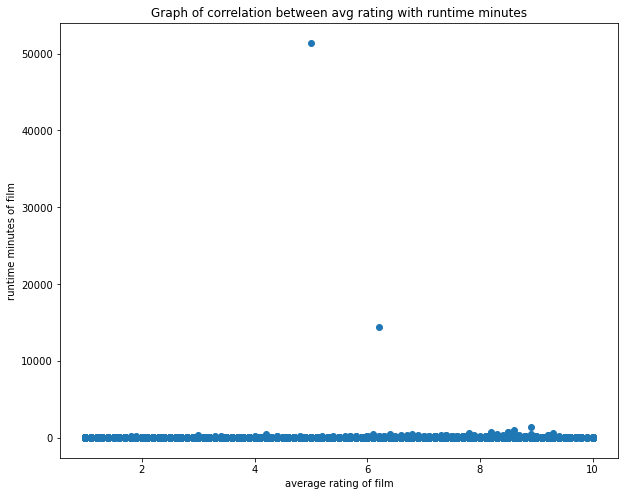

In [34]:
# data visualization
plt.figure(figsize=(10,8))
plt.scatter(runtime_and_rating.averagerating, runtime_and_rating.runtime_minutes)
plt.xlabel("average rating of film")
plt.ylabel('runtime minutes of film')
plt.title('Graph of correlation between avg rating with runtime minutes')
plt.show()

It is evident that the data contains some outliers and would require further research into the nature of these films.

In [35]:
runtime_and_rating.loc[runtime_and_rating['runtime_minutes'] > 10000]

,averagerating,primary_title,genres,runtime_minutes
12828,6.2,Modern Times Forever,Documentary,14400.0
44210,5.0,Logistics,Documentary,51420.0


Documentaries can be longer than most other genres and as such can be justified to be a valid point in the graph. We can still deal with these values by using the data in the 90th percentile

In [36]:
runtime_and_rating_no_outliers = runtime_and_rating.loc[runtime_and_rating['runtime_minutes'] < runtime_and_rating['runtime_minutes'].quantile(0.9)]  


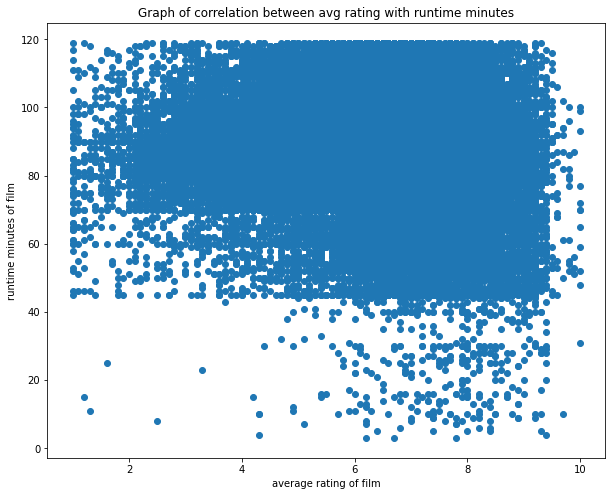

In [37]:
# data visualization
plt.figure(figsize=(10,8))
plt.scatter(runtime_and_rating_no_outliers.averagerating, runtime_and_rating_no_outliers.runtime_minutes)
plt.xlabel("average rating of film")
plt.ylabel('runtime minutes of film')
plt.title('Graph of correlation between avg rating with runtime minutes')
plt.show()

It is evident that movies having a runtime of 60 minutes up to 120 minutes. Generally had a higher rating hence more popular length of a film.

# Q2. What are the best rated genres?

In [53]:
# categorize the genres and use the mean of average rating for each genre
genre_and_rating = runtime_and_rating.groupby('genres')['averagerating'].mean().sort_values(ascending=False)
genre_and_rating

genres
Comedy,Documentary,Fantasy    9.4
Documentary,Family,Musical    9.3
Game-Show                     9.0
Documentary,News,Sport        8.8
Drama,Short                   8.8
                             ... 
Crime,Music                   2.4
Adventure,Crime,Romance       2.3
History,Sci-Fi,Thriller       2.3
Adult,Horror                  2.0
Comedy,Musical,Sport          1.4
Name: averagerating, Length: 906, dtype: float64

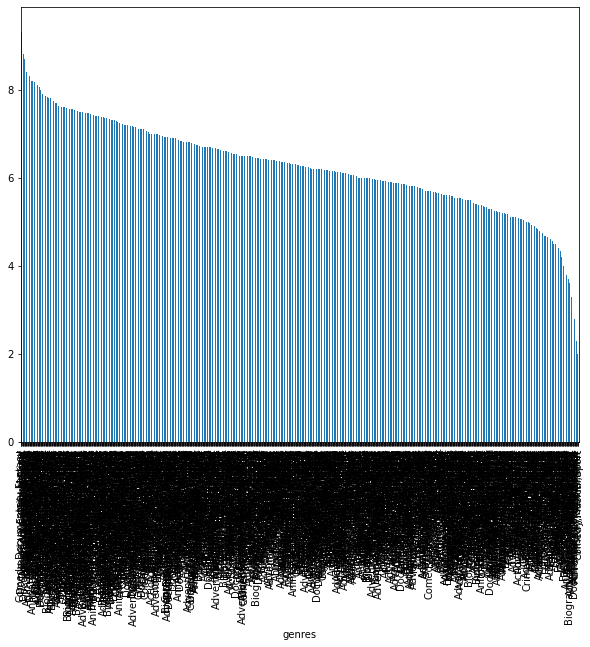

In [52]:
top_genre_ax = plt.bar

In [29]:
# We want to maintain all records, regardless of whether they receive a rating, thus we left join movie_ratings.
# Because we wish to maintain all documents, whether or not they have a director, we left join directors.
# Because we DO NOT want the individuals who are NOT directors in the dataset, we used inner join persons.

